<a href="https://colab.research.google.com/github/kavyasingh06/AI-/blob/main/Email_SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving sms+spam+collection.zip to sms+spam+collection (2).zip
Extracted files: ['SMSSpamCollection', 'readme']
Accuracy: 0.9704035874439462

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



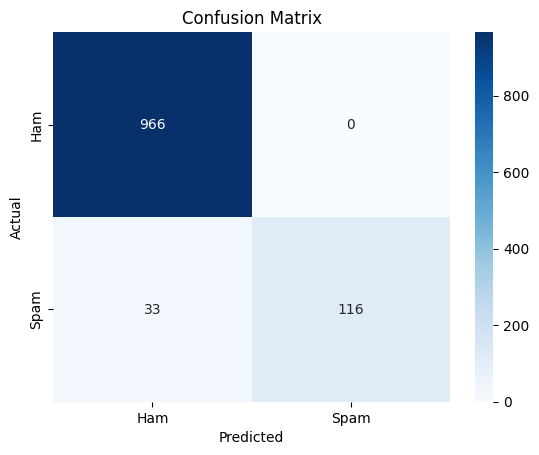


Message: Congratulations! You've won a free ticket. Call now!
Prediction: Not Spam


In [ ]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

# 📁 Step 2: Upload and Extract ZIP File
from google.colab import files
import zipfile

# Upload ZIP file (e.g. sms+spam+collection.zip)
uploaded = files.upload()

# Extract the ZIP
import os
with zipfile.ZipFile(next(iter(uploaded)), 'r') as zip_ref:
    zip_ref.extractall()
    extracted_files = zip_ref.namelist()
    print("Extracted files:", extracted_files)

# 🗃 Step 3: Load Dataset from Extracted Text File
# The file inside is usually named "SMSSpamCollection"
df = pd.read_csv("SMSSpamCollection", sep='\t', header=None, names=['label', 'message'])
df.head()

# 🔍 Step 4: Clean and Preprocess the Text
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    words = text.split()
    stop_words = stopwords.words('english')
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['clean_message'] = df['message'].apply(clean_text)

# 🔢 Step 5: Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_message'])
y = df['label']

# 🧠 Step 6: Split and Train the Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

# 📊 Step 7: Evaluate the Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 💬 Step 8: Try a Custom Message
def predict_spam(text):
    text_clean = clean_text(text)
    vector = vectorizer.transform([text_clean])
    pred = model.predict(vector)[0]
    return "Spam" if pred else "Not Spam"

# Example
user_input = "Congratulations! You've won a free ticket. Call now!"
print("\nMessage:", user_input)
print("Prediction:", predict_spam(user_input))
